### reading the data set

In [40]:
import pandas as pd
df=pd.read_csv("bollywood.csv")

### printing the data set

In [41]:
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


### finding the no of columns

In [42]:
print(df.count())
print(df.size)
print(df.shape)

SlNo                   149
Release Date           149
MovieName              149
ReleaseTime            149
Genre                  149
Budget                 149
BoxOfficeCollection    149
YoutubeViews           149
YoutubeLikes           149
YoutubeDislikes        149
dtype: int64
1490
(149, 10)


### How many movies got released in each genre? Which genre had highest number of releases? Sort number of releases in each genre in descending order.

In [43]:
df.groupby("Genre",sort=False).size()

Genre
Romance     25
Thriller    29
Comedy      36
Drama       35
Action      24
dtype: int64

In [44]:
df["Genre"].value_counts()

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

In [45]:
a=df["Genre"].value_counts().max()
print(a)
c=df["Genre"]
c.mode()


36


0    Comedy
Name: Genre, dtype: object

## How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)

In [46]:
pd.crosstab(index=df["Genre"],columns=df["ReleaseTime"])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


### which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.)

In [47]:
df["month"]=pd.DatetimeIndex(df["Release Date"]).month
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,month
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,4
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7
...,...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,2
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513,3
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,3
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,3


In [48]:
a=df["month"].value_counts()
print(a)
c=df["month"].mode()
c

1     20
3     19
5     18
7     16
2     16
4     11
9     10
6     10
11    10
10     9
8      8
12     2
Name: month, dtype: int64


0    1
Name: month, dtype: int64

### Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more

In [49]:
n1=df[df["Budget"]>25]["month"].mode()
n1

0    2
Name: month, dtype: int64

### Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget

In [50]:
n2=df[["MovieName","BoxOfficeCollection"]]

In [51]:
n2 

,MovieName,BoxOfficeCollection
0,2 States,104.00
1,Table No. 21,12.00
2,Amit Sahni Ki List,4.00
3,Rajdhani Express,0.35
4,Bobby Jasoos,10.80
...,...,...
144,Dum Laga Ke Haisha,30.00
145,NH10,32.10
146,Dilliwali Zaalim Girlfriend,12.00
147,Hunterrr,11.89


In [52]:
n3=n2.sort_values(by="BoxOfficeCollection")

In [53]:
n3

,MovieName,BoxOfficeCollection
9,Gangoobai,0.01
15,Bandook,0.09
53,Sona Spa,0.24
3,Rajdhani Express,0.35
49,Kya Dilli Kya Lahore,0.50
...,...,...
92,Bang Bang,340.00
43,Kick,377.00
26,Happy New Year,383.00
115,Chennai Express,395.00


In [54]:
n3.tail(10)

,MovieName,BoxOfficeCollection
101,Bhaag Milkha Bhaag,164.0
78,Singham Returns,200.0
132,Grand Masti,298.0
119,Krrish 3,300.0
82,Yeh Jawaani Hai Deewani,311.0
92,Bang Bang,340.0
43,Kick,377.0
26,Happy New Year,383.0
115,Chennai Express,395.0
89,PK,735.0


In [55]:
df["roi"]=(df["BoxOfficeCollection"]-df["Budget"])/df["Budget"]

In [56]:
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,month,roi
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,4,1.888889
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1,0.200000
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7,-0.600000
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1,-0.950000
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7,-0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,2,1.000000
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513,3,1.469231
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,3,-0.625000
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,3,1.378000


In [57]:
print(df["roi"])

0      1.888889
1      0.200000
2     -0.600000
3     -0.950000
4     -0.400000
         ...   
144    1.000000
145    1.469231
146   -0.625000
147    1.378000
148   -0.200000
Name: roi, Length: 149, dtype: float64


## Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times

In [58]:
print(df[["roi","ReleaseTime"]])

          roi ReleaseTime
0    1.888889          LW
1    0.200000           N
2   -0.600000           N
3   -0.950000           N
4   -0.400000           N
..        ...         ...
144  1.000000           N
145  1.469231           N
146 -0.625000           N
147  1.378000           N
148 -0.200000          HS

[149 rows x 2 columns]


In [59]:
df["roi"].max()


8.166666666666666

In [60]:
print(df[df["roi"]>8.1]["ReleaseTime"])

64    N
Name: ReleaseTime, dtype: object


In [61]:
df.describe()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,month,roi
count,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000
mean,75.000000,29.442953,55.667248,3.337920e+06,7877.536913,1207.818792,5.322148,0.764387
std,43.156691,28.237981,94.494531,3.504407e+06,12748.047191,1852.692938,3.209505,1.840021
min,1.000000,2.000000,0.010000,4.354000e+03,1.000000,1.000000,1.000000,-0.995000
25%,38.000000,11.000000,8.780000,1.076591e+06,1377.000000,189.000000,3.000000,-0.470370
50%,75.000000,21.000000,28.000000,2.375050e+06,4111.000000,614.000000,5.000000,0.200000
75%,112.000000,35.000000,57.450000,4.550051e+06,9100.000000,1419.000000,8.000000,1.383333
max,149.000000,150.000000,735.000000,2.317107e+07,101275.000000,11888.000000,12.000000,8.166667


In [62]:
a=df[["ReleaseTime","roi"]]
a

,ReleaseTime,roi
0,LW,1.888889
1,N,0.200000
2,N,-0.600000
3,N,-0.950000
4,N,-0.400000
...,...,...
144,N,1.000000
145,N,1.469231
146,N,-0.625000
147,N,1.378000


In [63]:
n=a[a["ReleaseTime"]=="N"]["roi"]
print(n)
print(n.count())
print(sum(n/n.count()))

1      0.200000
2     -0.600000
3     -0.950000
4     -0.400000
6     -0.180000
         ...   
141   -0.050000
144    1.000000
145    1.469231
146   -0.625000
147    1.378000
Name: roi, Length: 99, dtype: float64
99
0.6577216305350877


In [64]:
hs=a[a["ReleaseTime"]=="HS"]["roi"]
print(hs)
print(hs.count())
print(sum(n/hs.count()))

5      4.000000
12     2.014286
17    -0.400000
19     0.260000
29    -0.090909
32     2.095238
36     1.580000
39    -0.150667
48    -0.750000
49    -0.928571
55    -0.416667
60     0.500000
67    -0.890000
85    -0.600000
89     7.647059
99     0.812500
133    0.833333
148   -0.200000
Name: roi, dtype: float64
18
3.617468967942983


In [67]:
LW=a[a["ReleaseTime"]=="LW"]["roi"]
print(LW)
print(LW.count())
print(sum(LW/LW.count()))


0      1.888889
8     -0.129032
16     1.700000
26     2.064000
52     0.375000
59     1.388889
61    -0.045455
78     1.222222
80    -0.858000
83     1.105263
96    -0.588235
114    0.827586
130   -0.757333
131    1.200000
132    7.514286
Name: roi, dtype: float64
15
1.1272053098737973


In [68]:
hs=a[a["ReleaseTime"]=="HS"]["roi"]
print(hs.count())
print(hs)
print(sum(hs/hs.count()))

18
5      4.000000
12     2.014286
17    -0.400000
19     0.260000
29    -0.090909
32     2.095238
36     1.580000
39    -0.150667
48    -0.750000
49    -0.928571
55    -0.416667
60     0.500000
67    -0.890000
85    -0.600000
89     7.647059
99     0.812500
133    0.833333
148   -0.200000
Name: roi, dtype: float64
0.8508667840873723


In [69]:
b=a.groupby(["ReleaseTime","roi"])

In [70]:
b.count()

Empty DataFrame
Columns: []
Index: [(FS, -0.9266666666666666), (FS, -0.8333333333333334), (FS, -0.625), (FS, -0.4642857142857143), (FS, -0.36363636363636365), (FS, -0.2), (FS, -0.1), (FS, 0.45), (FS, 0.4666666666666667), (FS, 0.875), (FS, 1.0833333333333333), (FS, 1.4285714285714286), (FS, 1.608695652173913), (FS, 1.875), (FS, 2.347826086956522), (FS, 4.266666666666667), (FS, 5.666666666666667), (HS, -0.9285714285714286), (HS, -0.89), (HS, -0.75), (HS, -0.6), (HS, -0.4166666666666667), (HS, -0.4), (HS, -0.2), (HS, -0.15066666666666662), (HS, -0.09090909090909091), (HS, 0.25999999999999995), (HS, 0.5), (HS, 0.8125), (HS, 0.8333333333333334), (HS, 1.58), (HS, 2.0142857142857142), (HS, 2.0952380952380953), (HS, 4.0), (HS, 7.647058823529412), (LW, -0.8580000000000001), (LW, -0.7573333333333333), (LW, -0.5882352941176471), (LW, -0.12903225806451613), (LW, -0.045454545454545456), (LW, 0.375), (LW, 0.8275862068965517), (LW, 1.105263157894737), (LW, 1.2), (LW, 1.2222222222222223), (LW, 1.3888888888888888), (LW, 1.7), (LW, 1.8888888888888888), (LW, 2.064), (LW, 7.514285714285714), (N, -0.995), (N, -0.9775), (N, -0.976), (N, -0.9500000000000001), (N, -0.8888888888888888), (N, -0.875), (N, -0.8709677419354839), (N, -0.86), (N, -0.84375), (N, -0.828), (N, -0.8214285714285714), (N, -0.7916666666666666), (N, -0.7857142857142857), (N, -0.7403846153846154), (N, -0.7333333333333333), (N, -0.7), (N, -0.635), (N, -0.625), (N, -0.6), (N, -0.5833333333333334), (N, -0.5783333333333334), (N, -0.5650000000000001), (N, -0.56), (N, -0.5555555555555556), (N, -0.5520833333333334), (N, -0.55), (N, -0.5), (N, -0.4703703703703703), (N, -0.45454545454545453), (N, -0.44), (N, -0.39999999999999997), (N, -0.36166666666666664), (N, -0.2975), (N, -0.24400000000000005), (N, -0.2), (N, -0.17999999999999997), (N, -0.16666666666666666), (N, -0.15428571428571425), (N, -0.15), (N, -0.14285714285714285), (N, -0.09166666666666666), (N, -0.075), (N, -0.07142857142857142), (N, -0.05), (N, 0.02857142857142857), (N, 0.037037037037037035), (N, 0.06666666666666667), (N, 0.09749999999999992), (N, 0.15), (N, 0.16400000000000006), ...]

[143 rows x 0 columns]

### Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies.

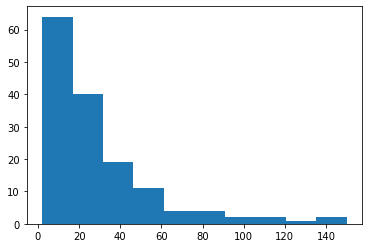

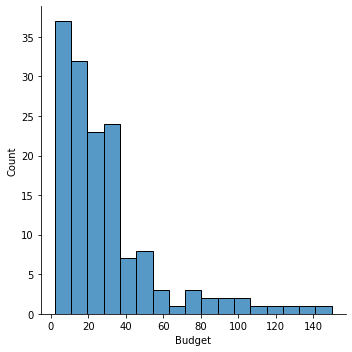

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df["Budget"])
sns.displot(df["Budget"])

plt.show()

C:\Users\PRIYANKA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Budget', ylabel='Density'>

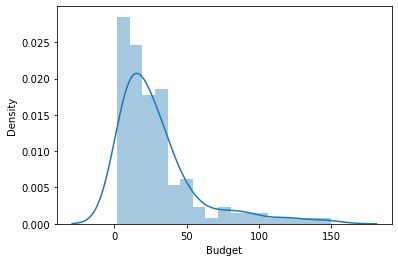

In [72]:
sns.distplot(df["Budget"])

### Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs?

In [73]:
a=df["Genre"]
a

0       Romance
1      Thriller
2        Comedy
3         Drama
4        Comedy
         ...   
144      Comedy
145    Thriller
146      Comedy
147      Comedy
148      Action
Name: Genre, Length: 149, dtype: object

C:\Users\PRIYANKA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='roi', ylabel='Density'>

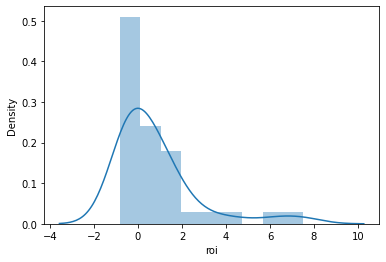

In [74]:
sns.distplot(df[df["Genre"]=="Comedy"]["roi"])

C:\Users\PRIYANKA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='roi', ylabel='Density'>

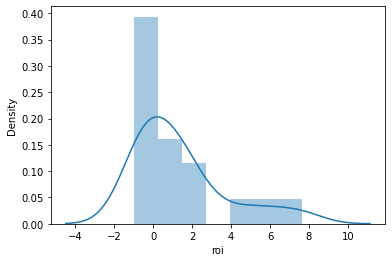

In [75]:
sns.distplot(df[df["Genre"]=="Drama"]["roi"])

### Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

In [77]:
df["BoxOfficeCollection"].corr(df["YoutubeLikes"])

0.6825165877731297

### Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

<AxesSubplot:xlabel='Genre', ylabel='YoutubeLikes'>

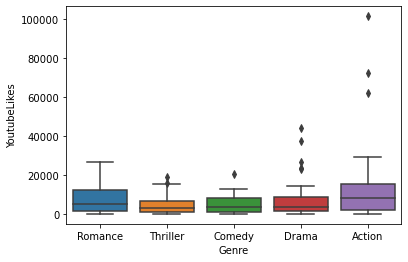

In [79]:
sns.boxplot(data=df, x='Genre',y='YoutubeLikes')

### which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.**

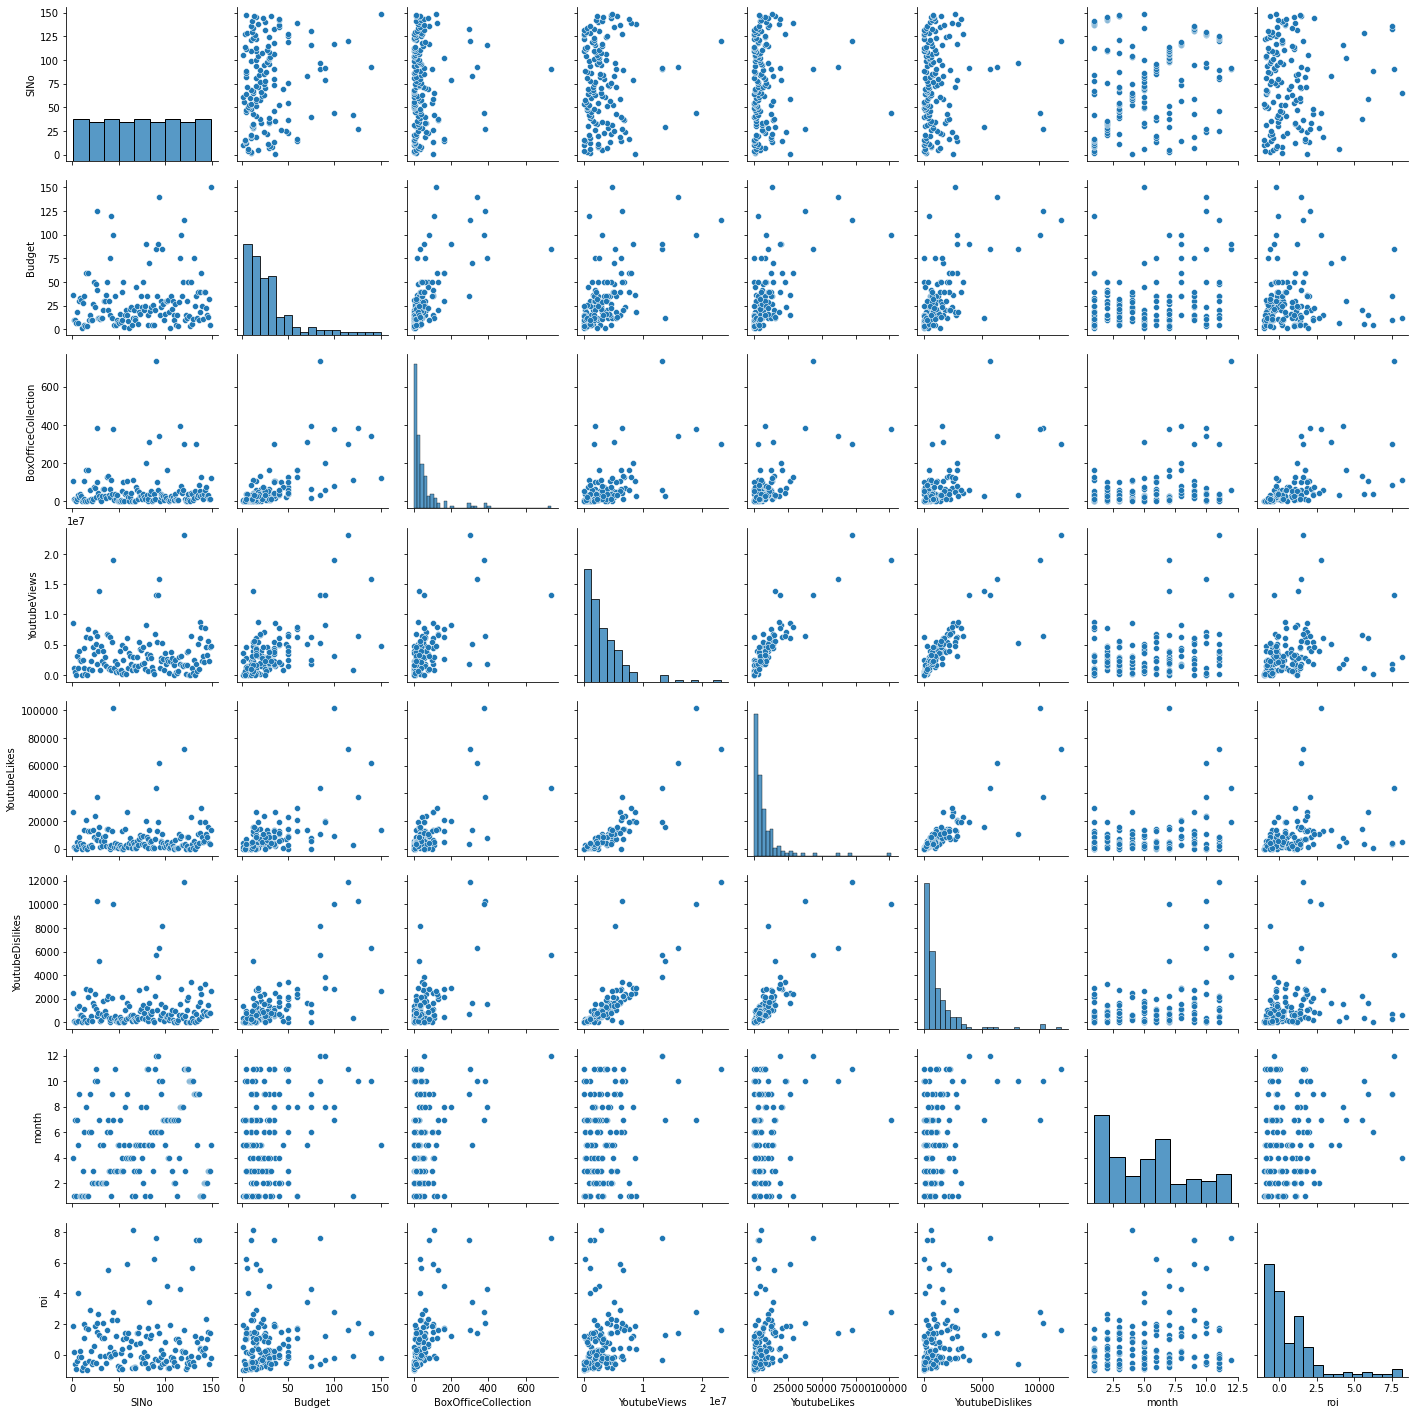

In [80]:
sns.pairplot(df)

In [81]:
df.corr()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,month,roi
SlNo,1.000000,0.116899,0.036908,0.025027,0.018163,0.035949,0.219954,0.037314
Budget,0.116899,1.000000,0.650401,0.589038,0.608916,0.665343,0.258457,0.072050
BoxOfficeCollection,0.036908,0.650401,1.000000,0.588632,0.682517,0.623941,0.280943,0.585042
YoutubeViews,0.025027,0.589038,0.588632,1.000000,0.884055,0.846739,0.289593,0.252847
YoutubeLikes,0.018163,0.608916,0.682517,0.884055,1.000000,0.859730,0.267112,0.291302
YoutubeDislikes,0.035949,0.665343,0.623941,0.846739,0.859730,1.000000,0.353301,0.201533
month,0.219954,0.258457,0.280943,0.289593,0.267112,0.353301,1.000000,0.205995
roi,0.037314,0.072050,0.585042,0.252847,0.291302,0.201533,0.205995,1.000000
